# ➕ MEDICAL INSURANCE COST  EDA 👨‍⚕️💊💰
  Database obtained through Kaggle.com

[Medical Insurance Cost Shortcut](https://www.kaggle.com/datasets/mosapabdelghany/medical-insurance-cost-dataset)

The “insurance.csv” dataset contains 1,338 medical records, including demographic information such as age, sex, and region across the United States.
We will perform an Exploratory Data Analysis (EDA) with a strong focus on data cleaning and a set of straightforward Python visualizations to uncover initial insights.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.shape

(1338, 7)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#Verify duplicates

df= df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [7]:
#Verificy null values

df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
plt.style.use('fast')
sns.set_style('darkgrid')
sns.set_palette('colorblind')

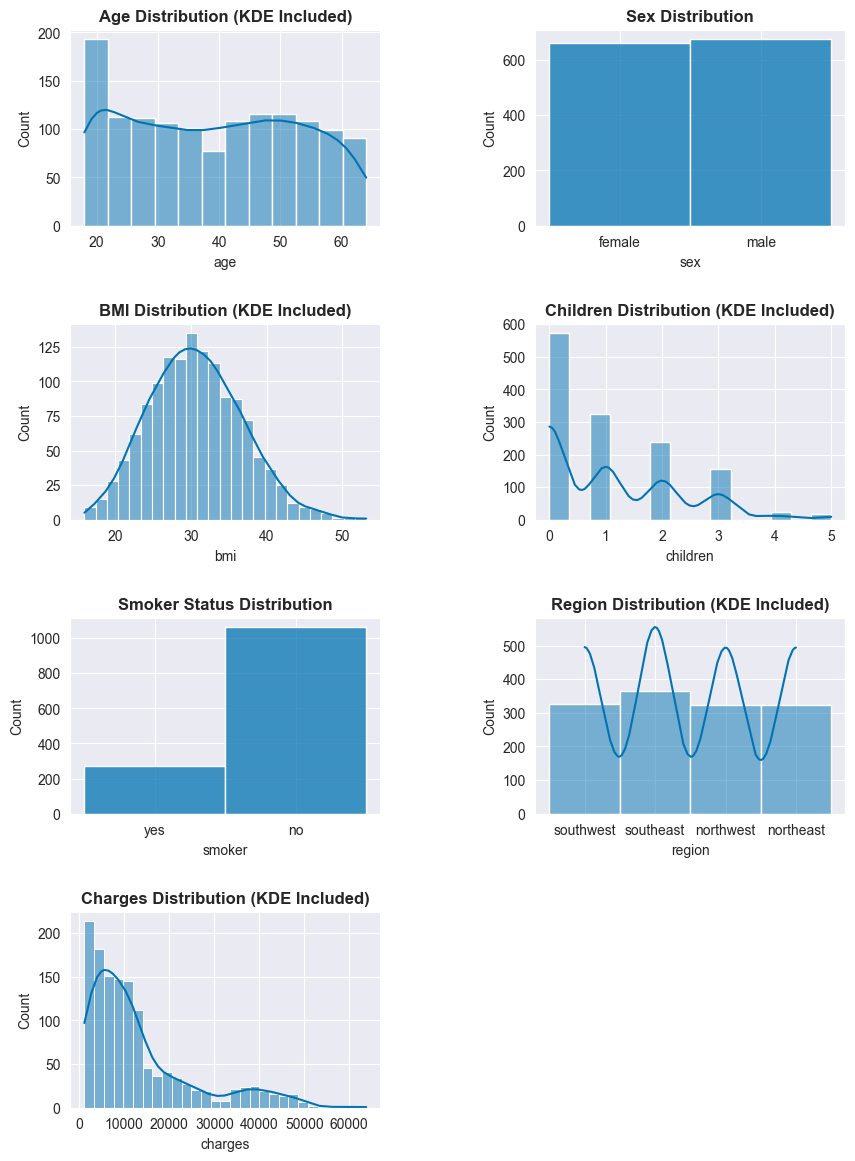

In [13]:
plt.figure(figsize=(10,14), facecolor='white', edgecolor='black')
plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.subplot(4,2,1)
sns.histplot(data=df, x='age', kde=True)
plt.title('Age Distribution (KDE Included)', fontweight='bold')

plt.subplot(4,2,2)
sns.histplot(data=df, x='sex')
plt.title('Sex Distribution', fontweight='bold')

plt.subplot(4,2,3)
sns.histplot(data=df, x='bmi', kde=True)
plt.title('BMI Distribution (KDE Included)', fontweight='bold')

plt.subplot(4,2,4)
sns.histplot(data=df, x='children', kde=True)
plt.title('Children Distribution (KDE Included)', fontweight='bold')

plt.subplot(4,2,5)
sns.histplot(data=df, x='smoker')
plt.title('Smoker Status Distribution', fontweight='bold')

plt.subplot(4,2,6)
sns.histplot(data=df, x='region', kde=True)
plt.title('Region Distribution (KDE Included)', fontweight='bold')

plt.subplot(4,2,7)
sns.histplot(data=df, x='charges', kde=True)
plt.title('Charges Distribution (KDE Included)', fontweight='bold')

plt.show()

## Analytical Insights

- The sample is primarily composed of individuals in their early twenties, with a fairly balanced distribution across the remaining age groups.

- The gender breakdown shows a slight predominance of males, although the difference is not statistically meaningful.

- The BMI distribution reveals a strong concentration between 25 and 34, which corresponds to the overweight and Class I obesity range.

- Most individuals in the dataset have no children or very few, which aligns with the predominantly young population observed earlier.

- The majority of respondents reported not being smokers.

- The dataset shows a relatively even distribution across geographic regions.

- Finally, medical charges cluster mostly below $10,000, with a declining frequency as the bill amount increases.

## Correlational Analysis and Key Insights

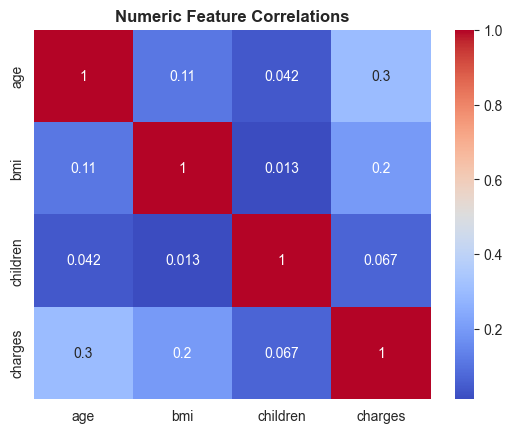

In [14]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Numeric Feature Correlations', fontweight='bold')
plt.show()

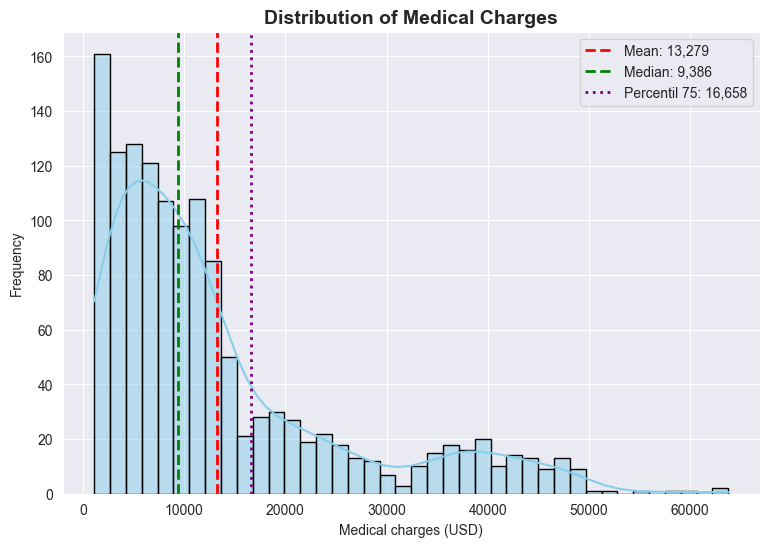

In [16]:
# Histogram with mean and median lines
plt.figure(figsize=(9,6))
sns.histplot(data=df, x='charges', bins=40, kde=True, color='skyblue', edgecolor='black')

# Calculate values
mean_val = df['charges'].mean()
median_val = df['charges'].median()
p75 = np.percentile(df['charges'], 75)

# Reference lines
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:,.0f}')
plt.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:,.0f}')
plt.axvline(p75, color='purple', linestyle=':', linewidth=2, label=f'Percentil 75: {p75:,.0f}')

# Tittle and labels
plt.title('Distribution of Medical Charges', fontsize=14, fontweight='bold')
plt.xlabel('Medical charges (USD)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

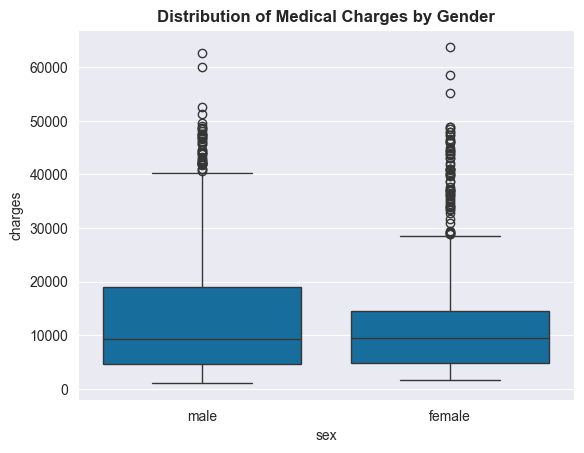

In [17]:
sns.boxplot(x='sex', y='charges', data=df, order=['male', 'female'])
plt.title('Distribution of Medical Charges by Gender', fontweight='bold')
plt.show()

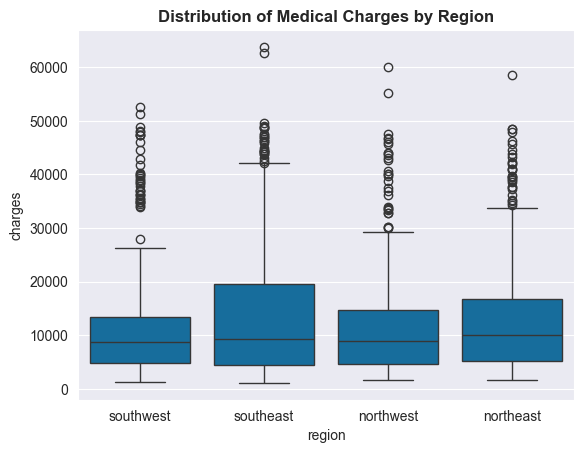

In [26]:
sns.boxplot(x='region', y='charges', data=df)
plt.title('Distribution of Medical Charges by Region', fontweight='bold')
plt.show()

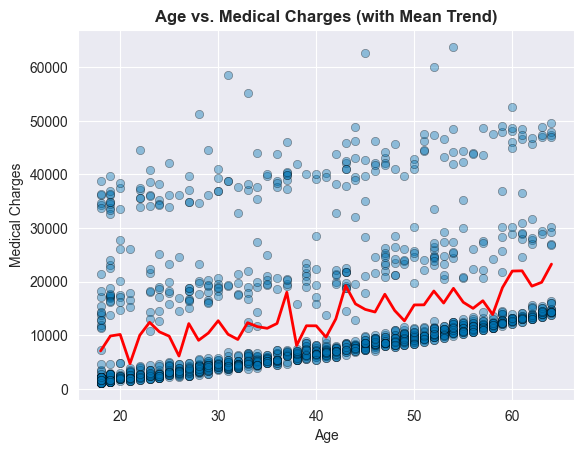

In [25]:
plt.scatter(x= 'age', y='charges', data=df, alpha=0.4, linewidths=0.5, edgecolor='black')
age_means = df.groupby('age')['charges'].mean().reset_index()
plt.plot(age_means['age'], age_means['charges'], color='red', linewidth=2)
plt.title('Age vs. Medical Charges (with Mean Trend)', fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Medical Charges')
plt.show()

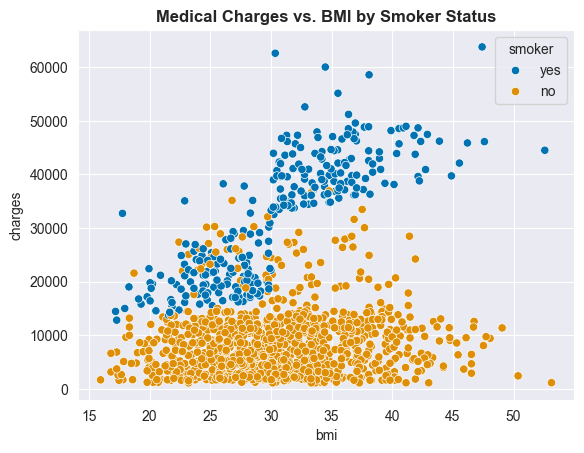

In [27]:
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('Medical Charges vs. BMI by Smoker Status', fontweight='bold')
plt.show()

## Conclusions

- The analysis shows that smokers incur substantially higher medical charges, representing the strongest cost-driving factor in the dataset.

- Both BMI and age exhibit a clear upward relationship with medical charges, and this effect becomes even more pronounced among active smokers, where risk factors compound.

- Gender differences in medical charges are minimal, suggesting that sex is not a meaningful predictor of cost within this sample.

- Geographic region does not display significant cost variation, indicating that regional effects are not a primary driver in this dataset.